         rownames  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.057333      3.758000     1.199333
std     43.445368      0.828066     0.435866      1.765298     0.762238
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000


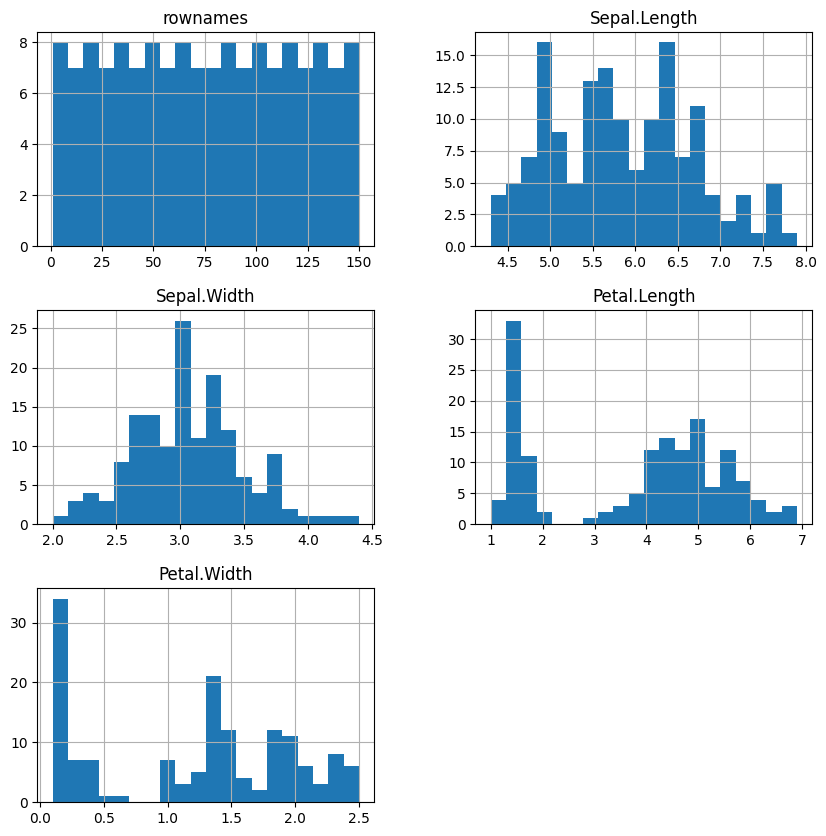

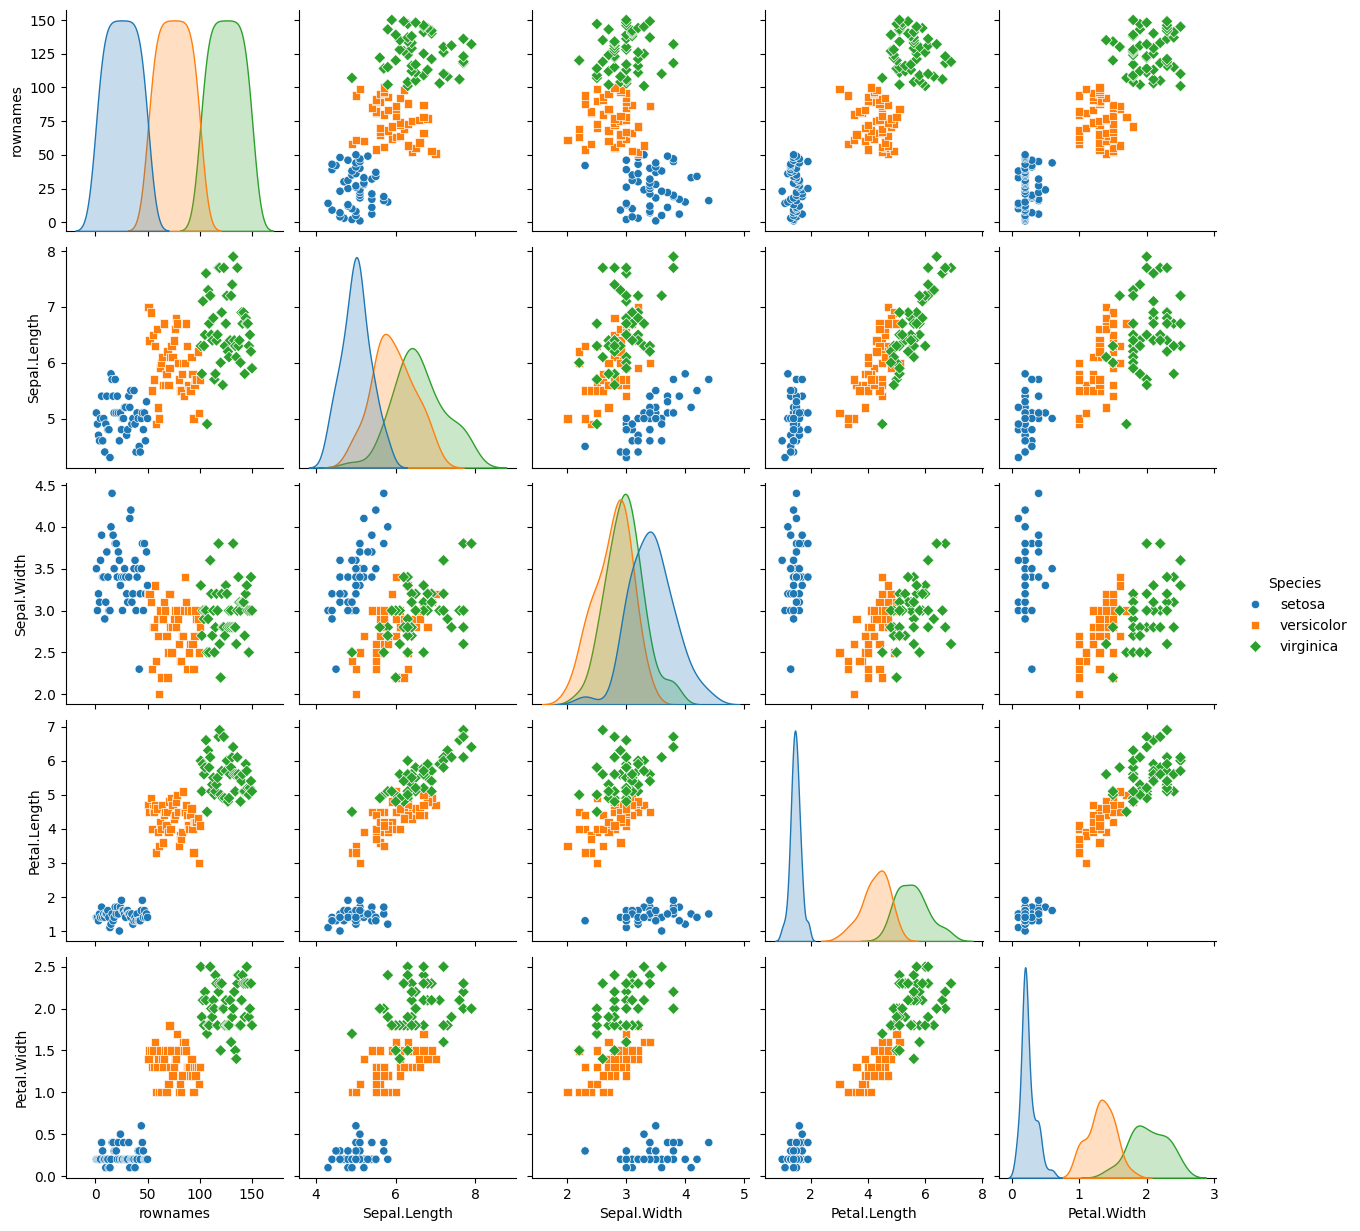

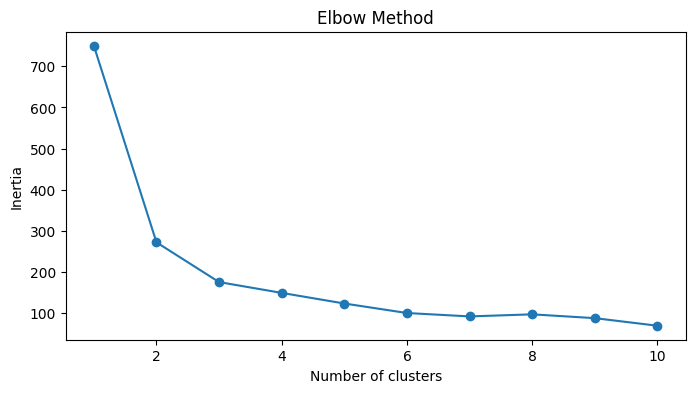

   rownames  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  \
0         1           5.1          3.5           1.4          0.2  setosa   
1         2           4.9          3.0           1.4          0.2  setosa   
2         3           4.7          3.2           1.3          0.2  setosa   
3         4           4.6          3.1           1.5          0.2  setosa   
4         5           5.0          3.6           1.4          0.2  setosa   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  
Silhouette Score: 0.45


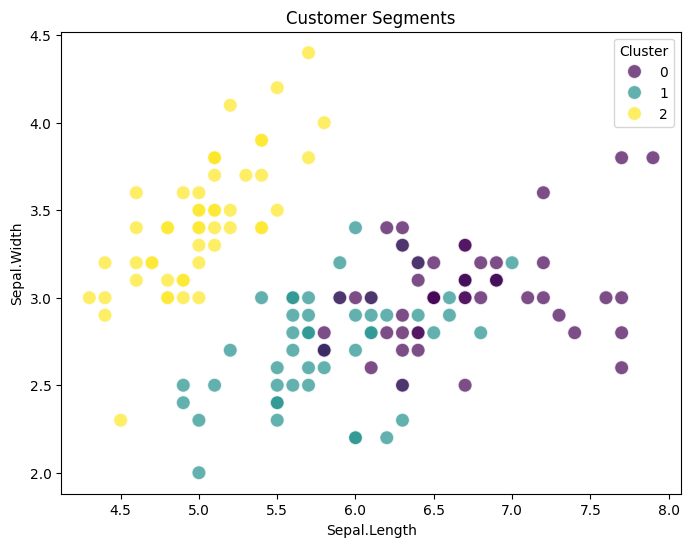

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/iris.csv"
df = pd.read_csv(url)

# EDA
print(df.describe())

df.hist(bins=20, figsize=(10, 10))
plt.show()

sns.pairplot(df, hue='Species', markers=["o", "s", "D"])
plt.show()

# Preprocessing
X = df.drop(columns=['Species'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
df['Cluster'] = labels
print(df.head())

# Silhouette score
score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {score:.2f}')

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sepal.Length', y='Sepal.Width', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments')
plt.show()
